# Elements of Convex Optimization 2024 - Project

### Solution author: Wiktoria Szarzyńska, 156058

This notebook uses helper classes and functions defined in [eco_project_helpers](eco_project_helpers) file, but there is no need to look at it.

This project requires **numpy**, **matplotlib**, **seaborn** and **[autograd](https://github.com/HIPS/autograd)** libraries.

## Task

The task is to implement an optimization algorithm that can deal with non-convex, multi-modal functions that are differentiable and smooth over the entire domain. Functions can have a varying number of arguments (more than 2). The quality of the solution is measured by the success rate of finding the global minimum of the function in a given budget of function (or gradient/Hessian) evaluations. The final grades will be calculated relative to the best-submitted solution. The best solution will be awarded with bonus points (+10 bonus percent point to the final grade).

## Benchmark functions

Below, you can find a few example benchmark functions. 
Please be aware that the final evaluation functions, which may have more than two arguments, could be more complex than the examples provided. These examples are a good starting point for testing your solution.

Function: Adjiman
Dimensions: 2
Bounds: ([-1.0, 2.0], [-1.0, 1.0])


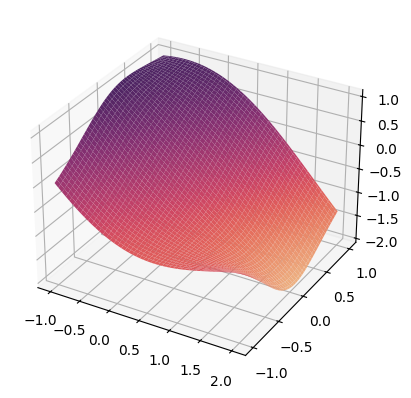

Function: Alpine02
Dimensions: 2
Bounds: [(0.001, 9.999), (0.001, 9.999)]


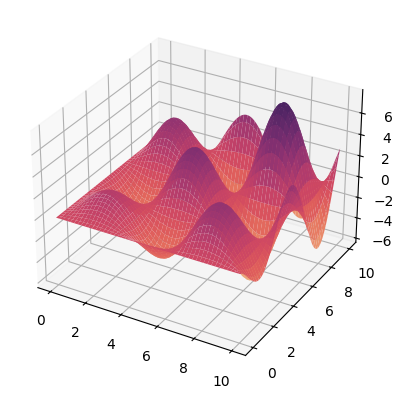

Function: Brent
Dimensions: 2
Bounds: [(-10.0, 10.0), (-10.0, 10.0)]


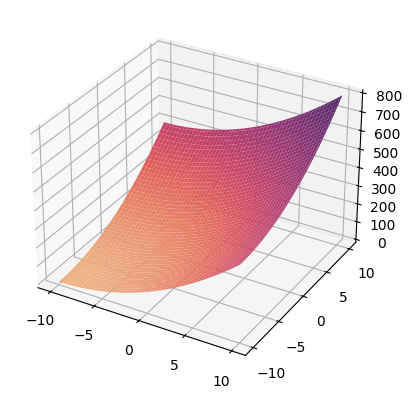

Function: Bird
Dimensions: 2
Bounds: [(-6.283185307179586, 6.283185307179586), (-6.283185307179586, 6.283185307179586)]


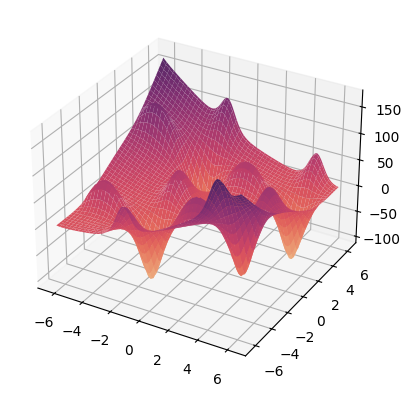

Function: GoldsteinPrice
Dimensions: 2
Bounds: [(-2.0, 2.0), (-2.0, 2.0)]


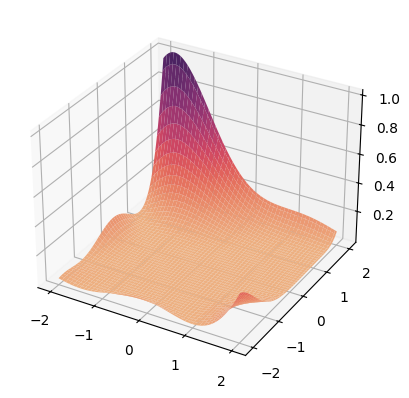

Function: Hosaki
Dimensions: 2
Bounds: ([0.0, 5.0], [0.0, 6.0])


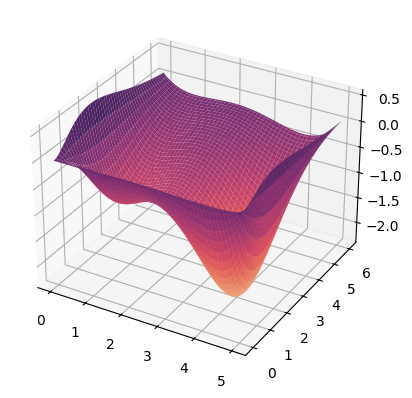

Function: Keane
Dimensions: 2
Bounds: [(0.001, 9.999), (0.001, 9.999)]


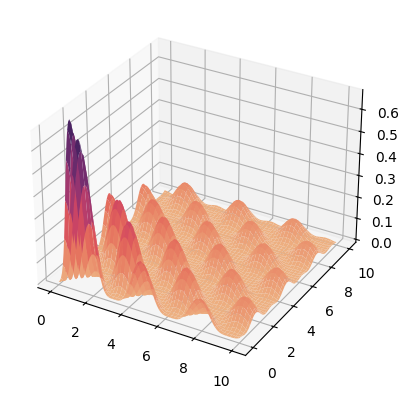

Function: Qing
Dimensions: 2
Bounds: [(-500.0, 500.0), (-500.0, 500.0)]


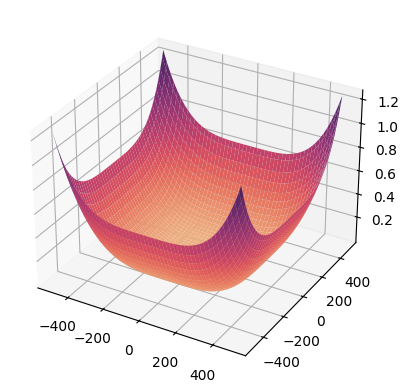

Function: Ripple25
Dimensions: 2
Bounds: [(0.0, 1.0), (0.0, 1.0)]


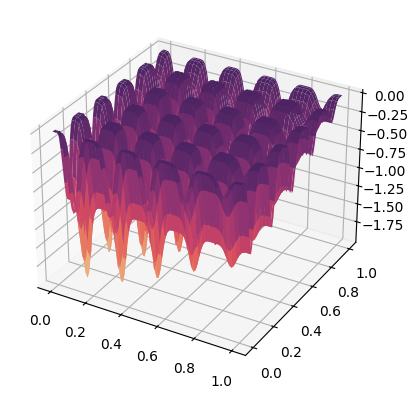

Function: Schwefel22
Dimensions: 2
Bounds: [(-100.0, 100.0), (-100.0, 100.0)]


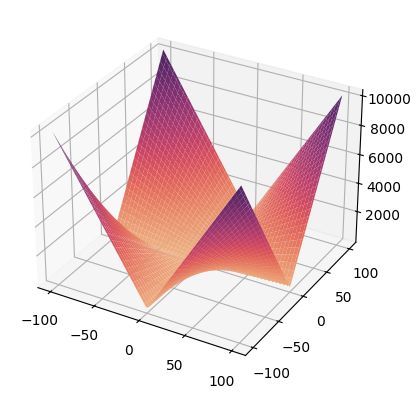

Function: StyblinskiTang
Dimensions: 2
Bounds: [(-5.0, 5.0), (-5.0, 5.0)]


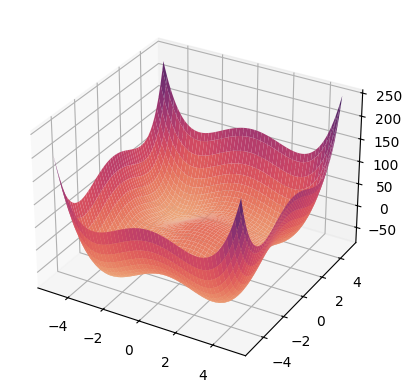

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from eco_project_helpers import BENCHMARK_FUNCTIONS, BenchmarkFunction


def plot_function_2d(f: BenchmarkFunction):
    if f.N == 2: # Plot only if function is 2D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        x = np.linspace(f.bounds[0][0], f.bounds[0][1], 100)
        y = np.linspace(f.bounds[1][0], f.bounds[1][1], 100)
        X, Y = np.meshgrid(x, y)
        Z = np.array([[f.func(np.array([x, y])) for x, y in zip(x, y)] for x, y in zip(X, Y)])
        ax.plot_surface(X, Y, Z, cmap=sns.color_palette("flare", as_cmap=True))
        plt.show()


def check_grad_and_hessian(f: BenchmarkFunction):
    x_1 = np.linspace(f.bounds[0][0], f.bounds[0][1], 100)
    x_2 = np.linspace(f.bounds[1][0], f.bounds[1][1], 100)
    for x_1_i in x_1:
        for x_2_i in x_2:
            x = np.array([x_1_i, x_2_i])
            grad = f.grad(x)
            H = f.hess(x)
            if np.isnan(grad).any() or np.isnan(H).any():
                print(f"NaN gradient or Hessian at {x}")
                return


for func_class in BENCHMARK_FUNCTIONS:
    f = func_class(budget=None)
    print(f"Function: {f.__class__.__name__}")
    print(f"Dimensions: {f.N}")
    print(f"Bounds: {f.bounds}")
    plot_function_2d(f)
    check_grad_and_hessian(f) # This may take some time

## Example implementations of naive solutions

In [3]:
def random_sampling(f: BenchmarkFunction):
    best_val = np.inf
    best_x = None
    while f.budget_left:
        x = np.random.uniform(f.xmin, f.xmax)
        val = f.func(x)

        if val < best_val:
            best_val = val
            best_x = x

    return best_x


def naive_gradient_descent(f: BenchmarkFunction):
    start_learnign_rate = 0.1
    x = np.random.uniform(f.xmin, f.xmax) # Random initial point
    budget = f.budget_left
    for i in range(budget):
        lr = start_learnign_rate * (budget - i) / budget # Linearly decrease learning rate
        grad = f.grad(x)
        new_x = x - lr * grad

        # Only move to new point if it is within bounds
        if np.all(new_x >= f.xmin) and np.all(new_x <= f.xmax):
            x = new_x

    return x

## Evaluation

Your solution will be evaluated similarly to the code below. The evaluation will be done on a set of benchmark functions that are not presented here. The x returned by the function will be compared to the global minimum of the function. The returned x will be considered the global minimum if the value of the function in x is less than 1e-5, then the value of the global minimum.

In [4]:
from typing import Callable, List

def eval_optimization_method(
        opt_f: Callable[[BenchmarkFunction], np.ndarray], 
        benchmarks: List[BenchmarkFunction], 
        budget: int = 1000, 
        repetitions: int = 10               
    ):
    for func_class in benchmarks:
        success_rate = 0
        for _ in range(repetitions):
            f = func_class(budget=budget)
            x = opt_f(f)
            if f.success(x):
                success_rate += 1
        success_rate /= repetitions
        print(f"Success rate of {opt_f.__name__}({f.__class__.__name__}(budget={budget})) = {success_rate}")

eval_optimization_method(random_sampling, BENCHMARK_FUNCTIONS, budget=1000)
eval_optimization_method(naive_gradient_descent, BENCHMARK_FUNCTIONS, budget=1000)

Success rate of random_sampling(Adjiman(budget=1000)) = 0.0
Success rate of random_sampling(Alpine02(budget=1000)) = 0.0
Success rate of random_sampling(Brent(budget=1000)) = 0.0
Success rate of random_sampling(Bird(budget=1000)) = 0.0
Success rate of random_sampling(GoldsteinPrice(budget=1000)) = 0.0
Success rate of random_sampling(Hosaki(budget=1000)) = 0.0
Success rate of random_sampling(Keane(budget=1000)) = 1.0
Success rate of random_sampling(Qing(budget=1000)) = 0.0
Success rate of random_sampling(Ripple25(budget=1000)) = 0.0
Success rate of random_sampling(Schwefel22(budget=1000)) = 0.0
Success rate of random_sampling(StyblinskiTang(budget=1000)) = 0.0
Success rate of naive_gradient_descent(Adjiman(budget=1000)) = 0.0
Success rate of naive_gradient_descent(Alpine02(budget=1000)) = 0.5
Success rate of naive_gradient_descent(Brent(budget=1000)) = 1.0
Success rate of naive_gradient_descent(Bird(budget=1000)) = 0.4
Success rate of naive_gradient_descent(GoldsteinPrice(budget=1000)) 

## Your solution 🚀

Implement your solution below. DO NOT change the name of the function, and DO NOT add positional arguments to it (keyword arguments with default values are ok), as it will be graded and evaluated automatically.

In [26]:
class SGDOptimizer:
    def __init__(self, learning_rate, momentum):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.velocity = None

    def update(self, x, grad):
        if self.velocity is None:
            self.velocity = np.zeros_like(x)

        self.velocity = self.momentum * self.velocity - self.learning_rate * grad
        x = x + self.velocity

        return x

In [29]:
def my_global_optimization_algorithm(f: BenchmarkFunction):

    dim = f.N # Number of input dimensions (function arguments)
    x = np.random.uniform(f.xmin, f.xmax)
    budget = f.budget_left # Remaining budget

    val = f.func(x) # Evaluate function at x, reduce budget by 1
    grad = f.grad(x) # Evaluate gradient at x, reduce budget by 1

    # add momentum and learning rate
    momentum = 0.99
    learning_rate = 0.05
    
    sgdo = SGDOptimizer(learning_rate=learning_rate, momentum = momentum) # class SGDOptimizer --> stochastic optimization method

    best_x = x
    best_val = val
    
    while f.budget_left > 2: # ensure that value error won't occur
        for _ in range(budget):
            if f.budget_left < 3:
                break
            
            grad = f.grad(x)
            x_new = sgdo.update(x, grad)
            
            x_new = np.clip(x_new, f.xmin, f.xmax)
            if np.linalg.norm(x_new - x) < (1e-6):
                val = f.func(x_new)
            
            
            if val < best_val:
                best_val = val
                best_x = x_new
            
            
            x = np.random.uniform(f.xmin, f.xmax) #restart x, new random point
            break
            
        x = x_new

    value = f.func(x)
    
    if value < best_val:
        best_x = x
        best_val = value
        
    return best_x

Tips: 
- Check how your function performs on the benchmark functions with different budgets (e.g., 100, 500, 1000, 2000). 
- Use a large number of repetitions to get a better estimate of the success rate of your solution.

In [30]:
eval_optimization_method(my_global_optimization_algorithm, BENCHMARK_FUNCTIONS, budget=2000, repetitions=100)

Success rate of my_global_optimization_algorithm(Adjiman(budget=2000)) = 0.96
Success rate of my_global_optimization_algorithm(Alpine02(budget=2000)) = 0.42
Success rate of my_global_optimization_algorithm(Brent(budget=2000)) = 1.0
Success rate of my_global_optimization_algorithm(Bird(budget=2000)) = 0.0
Success rate of my_global_optimization_algorithm(GoldsteinPrice(budget=2000)) = 0.0
Success rate of my_global_optimization_algorithm(Hosaki(budget=2000)) = 0.72
Success rate of my_global_optimization_algorithm(Keane(budget=2000)) = 1.0
Success rate of my_global_optimization_algorithm(Qing(budget=2000)) = 0.0
Success rate of my_global_optimization_algorithm(Ripple25(budget=2000)) = 0.0
Success rate of my_global_optimization_algorithm(Schwefel22(budget=2000)) = 0.0
Success rate of my_global_optimization_algorithm(StyblinskiTang(budget=2000)) = 0.08
